# Regresión lineal

## Introducción 

En este documento se abordara el tema de la regresion lineal, basados en un dataset que pertenece a una startup.<br>
El dataset  contiene la informacion de las ganancias de la empresa y de inversiones de la empresa en diferentes temas<br>
como marketing, investigación, y la administracion.<br>

la idea es predecir la ganancia que la empresa obtendra, dadas las siguientes variables:
    

-gastos en investigacion y desarrollo<br>
-administración <br>
-gastos en marketing<br>
-Estado<br>

El dataset se puede encontrar en el siguiente enlace :https://www.kaggle.com/farhanmd29/50-startups
        
        




## Visualizando los datos

In [72]:
import pandas as pd
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
import seaborn as sns; sns.set()
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.formula.api as smf
import numpy as np
import pandas

In [73]:
datos = pd.read_csv('50_Startups.csv') #cargando los datos del archivo llamado coca en formato .csv
datos.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## La forma de las variables 

In [74]:
datos.rename(columns={"Marketing Spend": "Marketing_Spend","R&D Spend":"RD_Spend"}, inplace=True)


skewness RD_Spend = 0.164002172321177
kurtosis RD_Spend = -0.7614645568424674


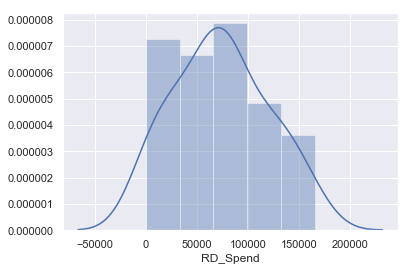

In [77]:
sns.distplot (datos['RD_Spend'])
s=datos['RD_Spend'].skew()
k=datos['RD_Spend'].kurt()
print ("skewness RD_Spend =",s)
print ("kurtosis RD_Spend =",k)

#### Variable RD_Spend (gasto en investigación y desarrollo)

¿qué podemos decir de esta variable?<br>

viendo su valor de simetria podemos ver que no es una distribucion normal pero algo muy importante es que 
todos sus valores se encuentran centrados, es decir no existen valores anormales (outliers) 



#### Variable Administration 


skewness administration = -0.4890248099671768
kurtosis administration = 0.22507113536865386


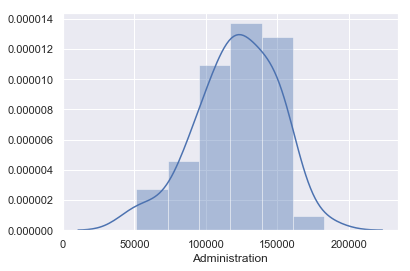

In [75]:
sns.distplot (datos['Administration'])
s=datos['Administration'].skew()
k=datos['Administration'].kurt()
print ("skewness administration =",s)
print ("kurtosis administration =",k)

¿qué podemos decir de esta variable?<br>

viendo su valor de simetria podemos ver que no es una distribucion normal pero al igual no existen valores muy alejados <br>
entre ellos auque si se puede ver que hay mas variacion entre ellos. (al menos mas que en la primera variable de rd_spend)

#### Variable Marketing_Spend 


skewness Marketing_Spend = -0.04647226758360412
kurtosis Marketing_Spend = -0.6717011281297514


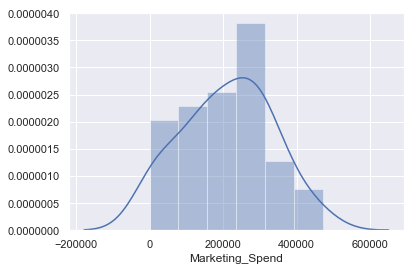

In [78]:
sns.distplot (datos['Marketing_Spend'])
s=datos['Marketing_Spend'].skew()
k=datos['Marketing_Spend'].kurt()
print ("skewness Marketing_Spend =",s)
print ("kurtosis Marketing_Spend =",k)

¿qué podemos decir de esta variable?<br>

viendo su valor de simetria podemos ver que no es una distribucion normal pero al igual no existen valores muy alejados <br>


# Relación entre los datos 

In [54]:
datos.corr()

,R&D Spend,Administration,Marketing_Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


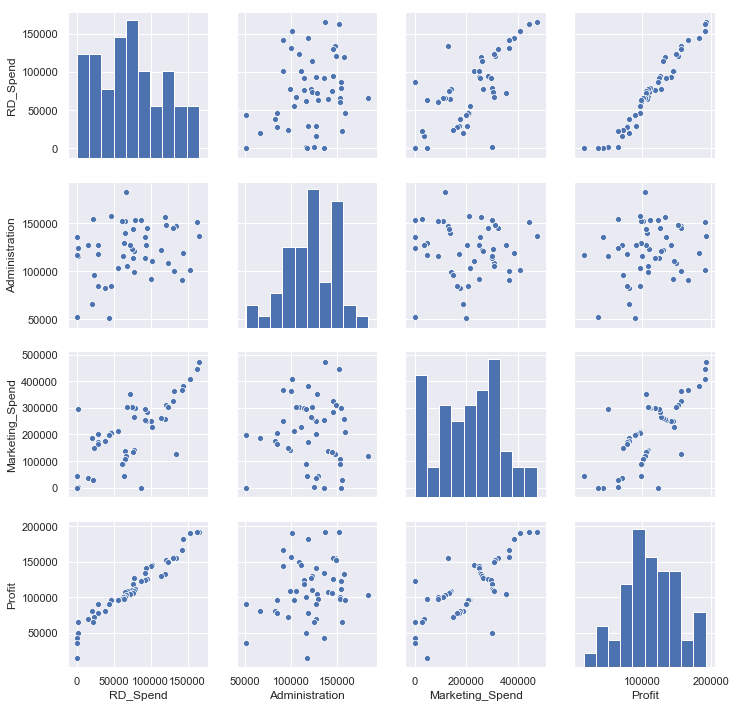

In [85]:
num_col=datos.select_dtypes(exclude=['object']).columns
ax = sns.pairplot(datos[num_col])


### Interpretación 
En la figura podemos confirmar lo que observamos en la tabla de correlación, se puede apreciar que nuestra variable profit, mantiene una fuerte relación lineal con RD_Spend.<br>

¿Con esto podemos asumir que la ganancia de la empresa se debe unicamente a el dinero gastado en investigación y desarrollo?<br>
podriamos decir que es importante pero para comprobarlo es necesario aplicar nuestro modelo de regresión 


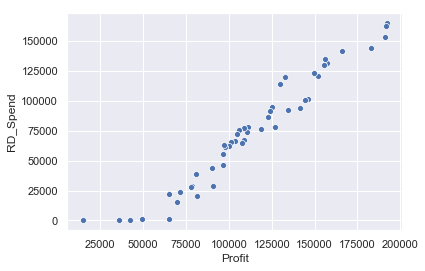

In [58]:
sns.scatterplot(x=datos['Profit'], y=datos['RD_Spend'])

### Regresion lineal simple

en este modelo vamos a predecir la ganancia en funcion de el gasto realizado en investigacion y desarrollo

In [86]:
lm = smf.ols ( formula = "Profit ~ RD_Spend", data = datos).fit() #predecir ganancias en funcion de gasto en desarrollo 


In [60]:
lm.params

Intercept    49032.899141
RD_Spend         0.854291
dtype: float64

### Modelo lineal predictivo 

#### profit = 49032.899141 + 0.854291 * RD_Spend



In [61]:
lm.pvalues #los parametros no son 0s son pequeños lo que quiere decir que son significativos

Intercept    2.782697e-24
RD_Spend     3.500322e-32
dtype: float64

In [62]:
lm.rsquared 

0.9465353160804392

In [63]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           3.50e-32
Time:                        03:40:54   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RD_Spend       0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Predicción 

In [88]:
datos_pred=lm.predict(pd.DataFrame(datos["RD_Spend"]))


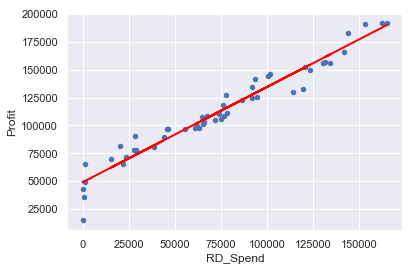

In [65]:
datos.plot(kind="scatter",x="RD_Spend", y="Profit")
plt.plot(pd.DataFrame(datos["RD_Spend"]),datos_pred, c="red", linewidth=2)

In [89]:
datos["datos_pred"]=  49032.899 + 0.854291*datos["RD_Spend"]


In [91]:
datos["RSE"]=(datos["Profit"] - datos["datos_pred"])**2

In [92]:
SSD = sum (datos["RSE"])
SSD

4256046566.4054356

In [94]:
RSE = np.sqrt (SSD/(len (datos)-2))
RSE

9416.349441270393

In [96]:
prof_m = np.mean (datos["Profit"])
prof_m

112012.63920000002

In [97]:
error = RSE/prof_m
error

0.08406506184054265

(array([ 1.,  0.,  1.,  2.,  0., 14., 10., 10.,  8.,  4.]),
 array([-34351.499     , -29197.53921942, -24043.57943883, -18889.61965825,
        -13735.65987766,  -8581.70009708,  -3427.7403165 ,   1726.21946409,
          6880.17924467,  12034.13902526,  17188.09880584]),
 <a list of 10 Patch objects>)

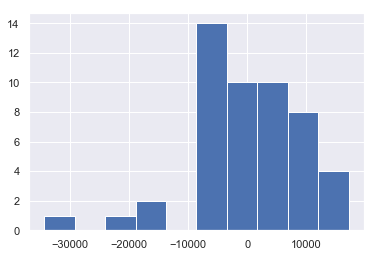

In [100]:
plt.hist (datos["Profit"] - datos["datos_pred"])

### ¿qué quiere decir todo esto?

<img src = "reg3.png"/>

Como podemos ver en nuestro modelo lineal, los puntos se encuentrar "cerca" de la recta de prediccion, aunque existen algunos
que tienen discrepancia. <br>
en la figura podemos ver un punto de color rosa, como podemos observar no se encuentra  exactamente sobre la recta roja de predicción, se encuentra desfasado levemente.

#### SSD 
suma de los cuadrados de las diferencias (diferencia con respecto a la recta modelo) representado por el color verde
esta explica la distancia de el dato observado (punto rosa) hasta la recta de prediccion.

#### SST
suma de los cuadrados totales (diferencia del punto observado con respecto a la linea promedio)

#### SSR
suma de los cuadrados de la regresión (diferencia entre la recta de regresion y la recta promedio)

¿Para qué sirven estos factores?<br>

imaginando que todos los puntos se encuentran exactamente en la linea roja, tendriamos que el SSD (diferencia de los cuadrados de la suma) desapareceria. haciendo a la SST = SSR.<br>
aunque las cosas no son asi, tenemos entonces que:
SST = SSR+SSD y lo que se busca es que la SSR sea grande y la SSD sean pequeñas, entre mas parecidos sean ssr a sst es mejor

de aqui se desprende R2 (r cuadrado)= SSR/SST (este siempre es mas pequeño que 1) y cuanto mas cerca este de 1 mejor sera el modelo.
